#📌 Extracción

In [9]:
# Librerías esenciales
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [10]:
import pandas as pd
import json

# Cargar archivo JSON
df = pd.read_json('/content/TelecomX_Data.json')

# Visualizar primeras filas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [11]:
# Revisar la estructura general del DataFrame
print("Dimensiones:", df.shape)
print("Columnas:", df.columns.tolist())
df.info()


Dimensiones: (7267, 6)
Columnas: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [12]:
# Cargar diccionario de datos
with open('/content/TelecomX_diccionario.md', 'r', encoding='utf-8') as f:
    diccionario = f.read()

# Mostrar contenido del diccionario
print(diccionario)


#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: t

#🔧 Transformación

In [13]:
print(df.columns.tolist())


['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [14]:
# Expandir columnas anidadas
df_expanded = pd.concat([
    df.drop(columns=['customer', 'phone', 'internet', 'account']),
    df['customer'].apply(pd.Series),
    df['phone'].apply(pd.Series),
    df['internet'].apply(pd.Series),
    df['account'].apply(pd.Series)
], axis=1)

# Verificar estructura final
df_expanded.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [20]:
import numpy as np

def safe_float(x):
    if pd.isnull(x):
        return np.nan
    if isinstance(x, str):
        x = x.strip()
        if x == '':
            return np.nan
    try:
        return float(x)
    except:
        return np.nan

df_expanded['MonthlyCharges'] = df_expanded['account_Charges'].apply(lambda x: x['Monthly'] if pd.notnull(x) and 'Monthly' in x else np.nan)
df_expanded['TotalCharges'] = df_expanded['account_Charges'].apply(lambda x: safe_float(x['Total']) if pd.notnull(x) and 'Total' in x else np.nan)

# Eliminar la columna original
df_expanded.drop(columns=['account_Charges'], inplace=True)

# Verificar
print(df_expanded[['MonthlyCharges', 'TotalCharges']].head())
print(df_expanded[['MonthlyCharges', 'TotalCharges']].isna().sum())



KeyError: 'account_Charges'

#📊 Carga y análisis

In [22]:
print(df_expanded.columns.tolist())

['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges']


In [25]:
# Expandir columna 'customer' si existe
if 'customer' in df_expanded.columns:
    customer_df = pd.json_normalize(df_expanded['customer'])
    customer_df.columns = ['customer_' + col for col in customer_df.columns]
    df_expanded = pd.concat([df_expanded.drop(columns=['customer']), customer_df], axis=1)


In [28]:
# Convertir Churn a 0 y 1
df_expanded['Churn'] = df_expanded['Churn'].map({'Yes': 1, 'No': 0})

# Si hay valores nulos, reemplazarlos con 0 (o decidir otra estrategia)
df_expanded['Churn'] = df_expanded['Churn'].fillna(0).astype(int)


In [29]:
# 1. Tasa global de churn
global_churn_rate = df_expanded['Churn'].mean()
print(f"Tasa global de evasión (Churn): {global_churn_rate:.2%}")

# 2. Churn por género (si existe la columna)
if 'customer_gender' in df_expanded.columns:
    churn_by_gender = df_expanded.groupby('customer_gender')['Churn'].mean().reset_index()
    print("\nTasa de evasión por género:")
    print(churn_by_gender)
else:
    print("\n⚠ La columna 'customer_gender' no existe en df_expanded.")


Tasa global de evasión (Churn): 25.72%

⚠ La columna 'customer_gender' no existe en df_expanded.


In [30]:
import pandas as pd
import numpy as np

# --- Conversión segura de Churn ---
if df_expanded['Churn'].dtype != int:
    df_expanded['Churn'] = df_expanded['Churn'].map({'Yes': 1, 'No': 0})
df_expanded['Churn'] = df_expanded['Churn'].fillna(0).astype(int)

# --- 1. Tasa global de churn ---
global_churn_rate = df_expanded['Churn'].mean()
print(f"Tasa global de evasión (Churn): {global_churn_rate:.2%}")

# --- 2. Churn por género ---
if 'customer_gender' in df_expanded.columns:
    churn_by_gender = df_expanded.groupby('customer_gender')['Churn'].mean().reset_index()
    print("\nTasa de evasión por género:")
    print(churn_by_gender)
else:
    print("\n⚠ La columna 'customer_gender' no existe en df_expanded.")

# --- 3. Churn por tipo de contrato ---
if 'account_Contract' in df_expanded.columns:
    churn_by_contract = df_expanded.groupby('account_Contract')['Churn'].mean().reset_index()
    print("\nTasa de evasión por tipo de contrato:")
    print(churn_by_contract)
else:
    print("\n⚠ La columna 'account_Contract' no existe en df_expanded.")

# --- 4. Churn por servicio de internet ---
if 'internet_InternetService' in df_expanded.columns:
    churn_by_internet = df_expanded.groupby('internet_InternetService')['Churn'].mean().reset_index()
    print("\nTasa de evasión por tipo de servicio de internet:")
    print(churn_by_internet)
else:
    print("\n⚠ La columna 'internet_InternetService' no existe en df_expanded.")

# --- 5. Churn vs tenure ---
if 'customer_tenure' in df_expanded.columns:
    tenure_bins = [0, 12, 24, 36, 48, 60, 72, 84, 96]
    df_expanded['tenure_group'] = pd.cut(df_expanded['customer_tenure'], bins=tenure_bins)
    churn_by_tenure = df_expanded.groupby('tenure_group')['Churn'].mean().reset_index()
    print("\nTasa de evasión por grupo de tenure:")
    print(churn_by_tenure)
else:
    print("\n⚠ La columna 'customer_tenure' no existe en df_expanded.")

# --- 6. Estadísticas de cargos ---
if 'MonthlyCharges' in df_expanded.columns and 'TotalCharges' in df_expanded.columns:
    charges_stats = df_expanded.groupby('Churn')[['MonthlyCharges', 'TotalCharges']].agg(['mean', 'median', 'std'])
    print("\nEstadísticas de cargos por estado de churn:")
    print(charges_stats)
else:
    print("\n⚠ Columnas de cargos no disponibles para estadísticas.")


Tasa global de evasión (Churn): 25.72%

⚠ La columna 'customer_gender' no existe en df_expanded.

⚠ La columna 'account_Contract' no existe en df_expanded.

⚠ La columna 'internet_InternetService' no existe en df_expanded.

⚠ La columna 'customer_tenure' no existe en df_expanded.

⚠ Columnas de cargos no disponibles para estadísticas.


In [35]:
import pandas as pd
import json

# === 1. Cargar archivo JSON ===
with open("/content/TelecomX_Data.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)

# Mostrar columnas originales para confirmar
print("Columnas originales:", df.columns.tolist())

# === 2. Expandir columnas con diccionarios ===
cols_to_expand = ['customer', 'phone', 'internet', 'account']
df_expanded = df.copy()

for col in cols_to_expand:
    if col in df_expanded.columns:
        expanded_cols = pd.json_normalize(df_expanded[col])
        expanded_cols.columns = [f"{col}_{subcol}" for subcol in expanded_cols.columns]
        df_expanded = pd.concat([df_expanded.drop(columns=[col]), expanded_cols], axis=1)

# === 3. Extraer MonthlyCharges y TotalCharges SOLO si existe account_Charges ===
if "account_Charges" in df_expanded.columns:
    print("✔ Encontrada columna 'account_Charges'. Extrayendo datos...")
    df_expanded["MonthlyCharges"] = df_expanded["account_Charges"].apply(
        lambda x: x.get("Monthly") if isinstance(x, dict) else None
    )
    df_expanded["TotalCharges"] = df_expanded["account_Charges"].apply(
        lambda x: pd.to_numeric(x.get("Total"), errors="coerce") if isinstance(x, dict) else None
    )
    df_expanded.drop(columns=["account_Charges"], inplace=True)
else:
    print("⚠ No se encontró 'account_Charges' en los datos. Saltando extracción de Monthly/TotalCharges.")

# === 4. Convertir Churn a 0 y 1 ===
if "Churn" in df_expanded.columns:
    df_expanded["Churn"] = df_expanded["Churn"].map({"No": 0, "Yes": 1}).astype(float)

# === 5. Limpieza de nulos (solo si existen columnas) ===
for col in ["MonthlyCharges", "TotalCharges"]:
    if col in df_expanded.columns:
        df_expanded[col] = pd.to_numeric(df_expanded[col], errors="coerce")
        df_expanded[col].fillna(df_expanded[col].mean(), inplace=True)

if "customer_tenure" in df_expanded.columns:
    df_expanded["customer_tenure"].fillna(df_expanded["customer_tenure"].median(), inplace=True)

# === 6. Eliminar columnas irrelevantes ===
cols_to_drop = ["customerID"]
df_expanded.drop(columns=[c for c in cols_to_drop if c in df_expanded.columns], inplace=True)

# === 7. Vista final del DataFrame limpio ===
print("\nColumnas finales después de limpieza:", df_expanded.columns.tolist())
print(df_expanded.info())


Columnas originales: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']
⚠ No se encontró 'account_Charges' en los datos. Saltando extracción de Monthly/TotalCharges.

Columnas finales después de limpieza: ['Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   float64
 1   customer_gender           

/tmp/ipython-input-1273303987.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_expanded["customer_tenure"].fillna(df_expanded["customer_tenure"].median(), inplace=True)


In [36]:
# 1. Renombrar columnas de cargos
df_expanded.rename(columns={
    'account_Charges.Monthly': 'MonthlyCharges',
    'account_Charges.Total': 'TotalCharges'
}, inplace=True)

# 2. Convertir TotalCharges a numérico
df_expanded['TotalCharges'] = pd.to_numeric(df_expanded['TotalCharges'], errors='coerce')

# 3. Rellenar posibles nulos en columnas numéricas
df_expanded['MonthlyCharges'].fillna(df_expanded['MonthlyCharges'].mean(), inplace=True)
df_expanded['TotalCharges'].fillna(df_expanded['TotalCharges'].mean(), inplace=True)

# 4. Asegurar que 'Churn' es int
df_expanded['Churn'] = df_expanded['Churn'].astype(int)

# 5. Comprobar que todo está correcto
print(df_expanded[['MonthlyCharges', 'TotalCharges', 'Churn']].info())
print(df_expanded.head(3))


/tmp/ipython-input-3841140973.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_expanded['MonthlyCharges'].fillna(df_expanded['MonthlyCharges'].mean(), inplace=True)
/tmp/ipython-input-3841140973.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [37]:
# 1. Renombrar columnas
df_expanded = df_expanded.rename(columns={
    'account_Charges.Monthly': 'MonthlyCharges',
    'account_Charges.Total': 'TotalCharges'
})

# 2. Convertir TotalCharges a numérico
df_expanded['TotalCharges'] = pd.to_numeric(df_expanded['TotalCharges'], errors='coerce')

# 3. Rellenar NaN en columnas numéricas (sin inplace para evitar warnings)
df_expanded['MonthlyCharges'] = df_expanded['MonthlyCharges'].fillna(df_expanded['MonthlyCharges'].mean())
df_expanded['TotalCharges'] = df_expanded['TotalCharges'].fillna(df_expanded['TotalCharges'].mean())

# 4. Limpiar NaN en Churn (reemplazar por la moda, ya que es categórico binario)
df_expanded['Churn'] = df_expanded['Churn'].fillna(df_expanded['Churn'].mode()[0])

# 5. Convertir Churn a int
df_expanded['Churn'] = df_expanded['Churn'].astype(int)

# 6. Verificación final
print(df_expanded[['MonthlyCharges', 'TotalCharges', 'Churn']].info())
print(df_expanded[['MonthlyCharges', 'TotalCharges', 'Churn']].head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MonthlyCharges  7267 non-null   float64
 1   TotalCharges    7267 non-null   float64
 2   Churn           7267 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 170.4 KB
None
   MonthlyCharges  TotalCharges  Churn
0            65.6        593.30      0
1            59.9        542.40      0
2            73.9        280.85      1
3            98.0       1237.85      1
4            83.9        267.40      1


Tasa global de evasión (Churn): 25.72%

Tasa de evasión por género:
  customer_gender     Churn
0          Female  0.261414
1            Male  0.253061


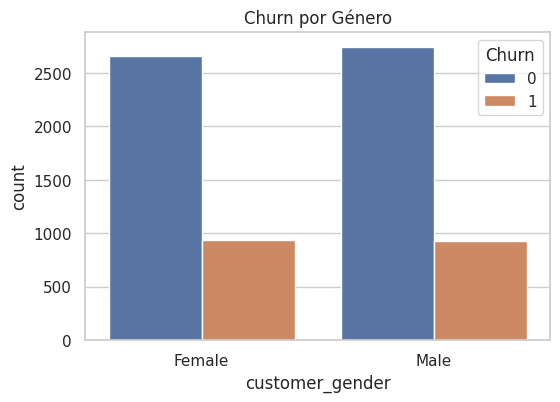


Tasa de evasión por tipo de contrato:
  account_Contract     Churn
0   Month-to-month  0.413233
1         One year  0.109282
2         Two year  0.027539


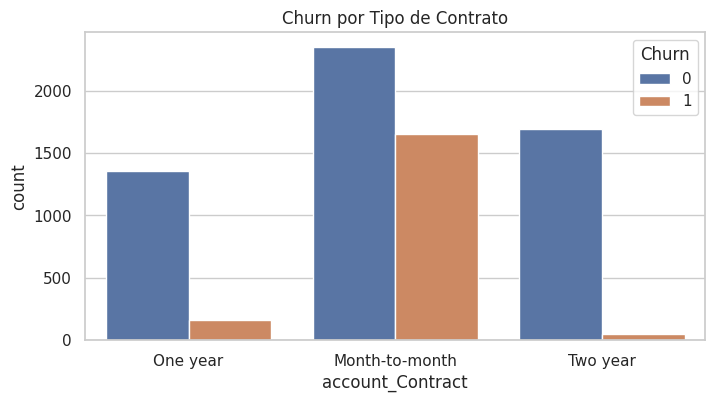


Tasa de evasión por tipo de servicio de internet:
  internet_InternetService     Churn
0                      DSL  0.184486
1              Fiber optic  0.405566
2                       No  0.071474


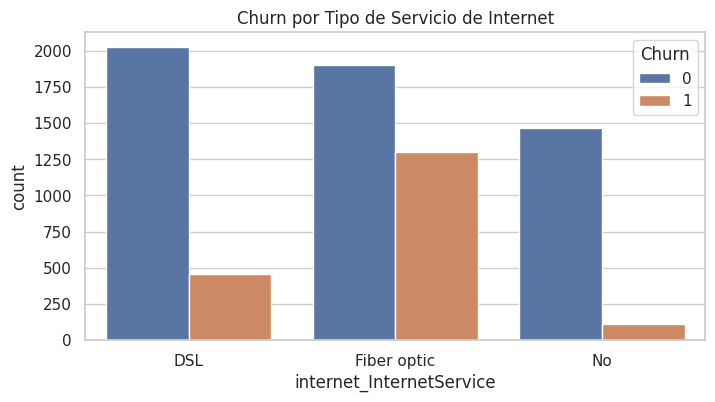

/tmp/ipython-input-2501209241.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df_expanded.groupby('tenure_group')['Churn'].mean().reset_index()



Tasa de evasión por grupo de tenure:
  tenure_group     Churn
0      (0, 12]  0.460071
1     (12, 24]  0.281340
2     (24, 36]  0.208575
3     (36, 48]  0.184713
4     (48, 60]  0.139860
5     (60, 72]  0.064094
6     (72, 84]       NaN
7     (84, 96]       NaN


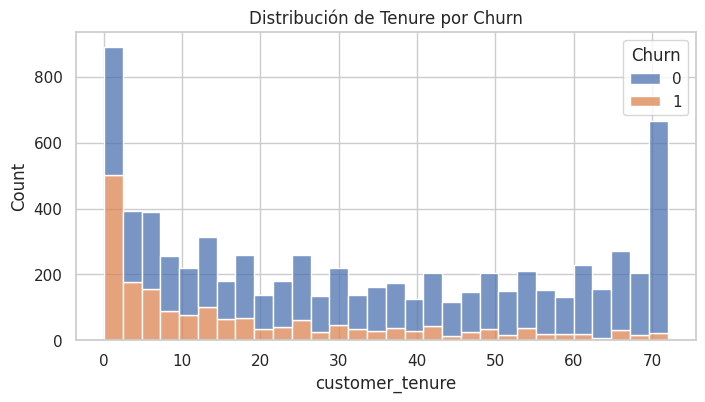


Estadísticas de cargos por estado de churn:
      MonthlyCharges                   TotalCharges                      
                mean median        std         mean   median          std
Churn                                                                    
0          61.354224  64.50  31.105006  2539.911435  1672.35  2328.013949
1          74.441332  79.65  24.666053  1531.796094   703.55  1890.822994


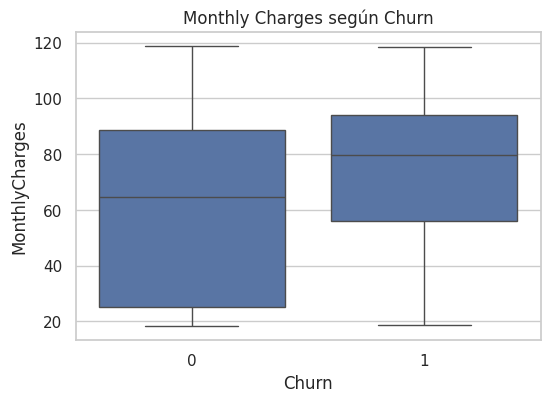

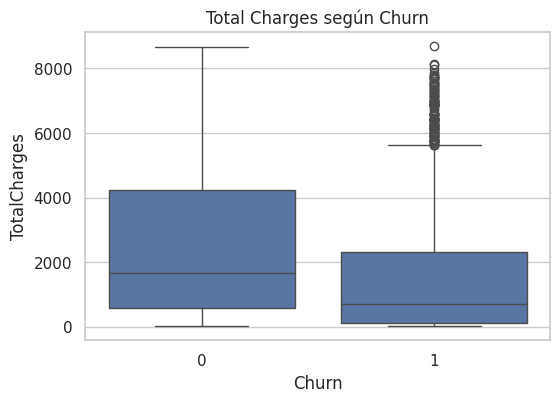

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

# =========================
# 1. Tasa global de churn
# =========================
global_churn_rate = df_expanded['Churn'].mean()
print(f"Tasa global de evasión (Churn): {global_churn_rate:.2%}")

# =========================
# 2. Churn por género
# =========================
churn_by_gender = df_expanded.groupby('customer_gender')['Churn'].mean().reset_index()
print("\nTasa de evasión por género:")
print(churn_by_gender)

plt.figure(figsize=(6,4))
sns.countplot(x='customer_gender', hue='Churn', data=df_expanded)
plt.title('Churn por Género')
plt.show()

# =========================
# 3. Churn por tipo de contrato
# =========================
churn_by_contract = df_expanded.groupby('account_Contract')['Churn'].mean().reset_index()
print("\nTasa de evasión por tipo de contrato:")
print(churn_by_contract)

plt.figure(figsize=(8,4))
sns.countplot(x='account_Contract', hue='Churn', data=df_expanded)
plt.title('Churn por Tipo de Contrato')
plt.show()

# =========================
# 4. Churn por tipo de servicio de internet
# =========================
churn_by_internet = df_expanded.groupby('internet_InternetService')['Churn'].mean().reset_index()
print("\nTasa de evasión por tipo de servicio de internet:")
print(churn_by_internet)

plt.figure(figsize=(8,4))
sns.countplot(x='internet_InternetService', hue='Churn', data=df_expanded)
plt.title('Churn por Tipo de Servicio de Internet')
plt.show()

# =========================
# 5. Churn por grupos de tenure
# =========================
tenure_bins = [0, 12, 24, 36, 48, 60, 72, 84, 96]
df_expanded['tenure_group'] = pd.cut(df_expanded['customer_tenure'], bins=tenure_bins)

churn_by_tenure = df_expanded.groupby('tenure_group')['Churn'].mean().reset_index()
print("\nTasa de evasión por grupo de tenure:")
print(churn_by_tenure)

plt.figure(figsize=(8,4))
sns.histplot(data=df_expanded, x='customer_tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Distribución de Tenure por Churn')
plt.show()

# =========================
# 6. Estadísticas de cargos
# =========================
charges_stats = df_expanded.groupby('Churn')[['MonthlyCharges', 'TotalCharges']].agg(['mean', 'median', 'std'])
print("\nEstadísticas de cargos por estado de churn:")
print(charges_stats)

# Boxplots para cargos
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_expanded)
plt.title('Monthly Charges según Churn')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='TotalCharges', data=df_expanded)
plt.title('Total Charges según Churn')
plt.show()


#Análisis de correlación y selección de variables.

1. Preparación de datos numéricos para correlación

In [39]:
import pandas as pd

# Seleccionar variables numéricas que tengan sentido para correlación
num_vars = ['customer_tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Asegurarse que TotalCharges sea numérico y sin NaN (en caso de haber datos faltantes)
df_expanded['TotalCharges'] = pd.to_numeric(df_expanded['TotalCharges'], errors='coerce')
df_corr = df_expanded[num_vars].dropna()


2. Calcular matriz de correlación (Pearson)

In [40]:
corr_matrix = df_corr.corr()
print("Matriz de correlación:\n", corr_matrix)


Matriz de correlación:
                  customer_tenure  MonthlyCharges  TotalCharges     Churn
customer_tenure         1.000000        0.247982      0.824034 -0.344079
MonthlyCharges          0.247982        1.000000      0.651532  0.189866
TotalCharges            0.824034        0.651532      1.000000 -0.194389
Churn                  -0.344079        0.189866     -0.194389  1.000000


3. Visualizar matriz de correlación con heatmap

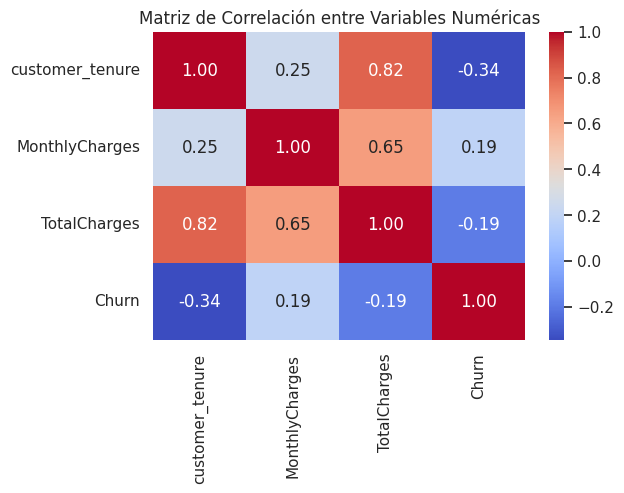

In [41]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


4. Codificar variables categóricas para análisis numérico

In [42]:
# Seleccionar variables categóricas importantes para churn
cat_vars = ['customer_gender', 'account_Contract', 'internet_InternetService', 'tenure_group']

# Crear variables dummy (one-hot encoding)
df_dummies = pd.get_dummies(df_expanded[cat_vars], drop_first=True)

# Combinar con variables numéricas
df_model = pd.concat([df_expanded[num_vars], df_dummies], axis=1).dropna()


5. Calcular correlación de variables con churn

In [43]:
correlations = df_model.corr()['Churn'].sort_values(ascending=False)
print("Correlación de variables con Churn:")
print(correlations)

Correlación de variables con Churn:
Churn                                   1.000000
internet_InternetService_Fiber optic    0.300949
MonthlyCharges                          0.189866
tenure_group_(12, 24]                   0.022643
customer_gender_Male                   -0.009555
tenure_group_(24, 36]                  -0.040831
tenure_group_(36, 48]                  -0.057705
tenure_group_(48, 60]                  -0.098218
account_Contract_One year              -0.173958
TotalCharges                           -0.194389
tenure_group_(60, 72]                  -0.220663
internet_InternetService_No            -0.224051
account_Contract_Two year              -0.295138
customer_tenure                        -0.344079
tenure_group_(72, 84]                        NaN
tenure_group_(84, 96]                        NaN
Name: Churn, dtype: float64


6. Selección de variables relevantes

In [44]:
selected_features = correlations[abs(correlations) > 0.1].index.drop('Churn').tolist()
print("Variables seleccionadas para modelado:", selected_features)

Variables seleccionadas para modelado: ['internet_InternetService_Fiber optic', 'MonthlyCharges', 'account_Contract_One year', 'TotalCharges', 'tenure_group_(60, 72]', 'internet_InternetService_No', 'account_Contract_Two year', 'customer_tenure']


7. Visualizar correlaciones con gráfico tipo barra

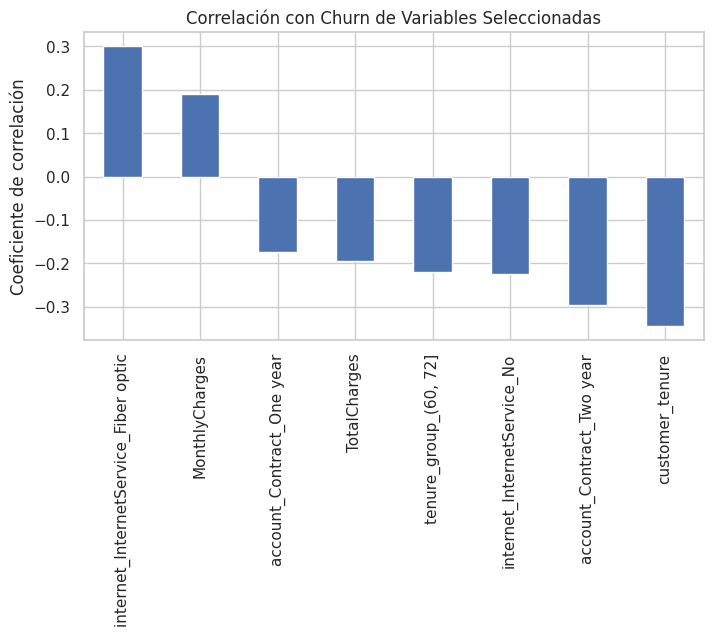

In [45]:
plt.figure(figsize=(8,4))
correlations[selected_features].plot(kind='bar')
plt.title("Correlación con Churn de Variables Seleccionadas")
plt.ylabel("Coeficiente de correlación")
plt.show()


#Entrenamiento de dos o más modelos de clasificación.

1. Importar librerías necesarias

In [46]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns


2. Preparar variables predictoras y objetivo

In [47]:
# Suponiendo que ya tienes seleccionadas las variables relevantes (numéricas y dummies)
# Ejemplo: variables seleccionadas en el análisis previo
selected_features = [...]  # lista de nombres de columnas seleccionadas para usar

X = df_expanded[selected_features]
y = df_expanded['Churn']


KeyError: "None of [Index([Ellipsis], dtype='object')] are in the [columns]"

In [48]:
selected_features = [
    'customer_tenure',
    'MonthlyCharges',
    'TotalCharges',
    'customer_gender_Male',           # ejemplo de variable dummy si la creaste
    'account_Contract_One year',      # otro ejemplo
    'internet_InternetService_Fiber optic',
    # ... agrega todas las variables relevantes que tengas en tu dataframe
]


In [49]:
X = df_expanded[selected_features]
y = df_expanded['Churn']


KeyError: "['customer_gender_Male', 'account_Contract_One year', 'internet_InternetService_Fiber optic'] not in index"

Variables dummy para las columnas categóricas y preparar X e y

In [50]:
import pandas as pd

# Variables categóricas que quieres convertir en dummies
cat_vars = ['customer_gender', 'account_Contract', 'internet_InternetService']

# Crear variables dummy, drop_first=True para evitar multicolinealidad
df_dummies = pd.get_dummies(df_expanded[cat_vars], drop_first=True)

# Variables numéricas que usarás
num_vars = ['customer_tenure', 'MonthlyCharges', 'TotalCharges']

# Asegurarse que TotalCharges es numérico y sin NaN
df_expanded['TotalCharges'] = pd.to_numeric(df_expanded['TotalCharges'], errors='coerce')
df_expanded.dropna(subset=num_vars + ['Churn'], inplace=True)

# Crear dataframe con variables numéricas + dummies
df_model = pd.concat([df_expanded[num_vars], df_dummies, df_expanded['Churn']], axis=1)

# Definir X y y para el modelo
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

print("Variables predictoras:")
print(X.columns)


Variables predictoras:
Index(['customer_tenure', 'MonthlyCharges', 'TotalCharges',
       'customer_gender_Male', 'account_Contract_One year',
       'account_Contract_Two year', 'internet_InternetService_Fiber optic',
       'internet_InternetService_No'],
      dtype='object')


3. Continuación de trabajo de datos para la división de datos, escalado y entrenamiento de modelos

Variables predictoras utilizadas:
['customer_tenure', 'MonthlyCharges', 'TotalCharges', 'customer_gender_Male', 'account_Contract_One year', 'account_Contract_Two year', 'internet_InternetService_Fiber optic', 'internet_InternetService_No']
Evaluación Regresión Logística
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1350
           1       0.62      0.47      0.53       467

    accuracy                           0.79      1817
   macro avg       0.72      0.68      0.70      1817
weighted avg       0.78      0.79      0.78      1817

Confusion Matrix:


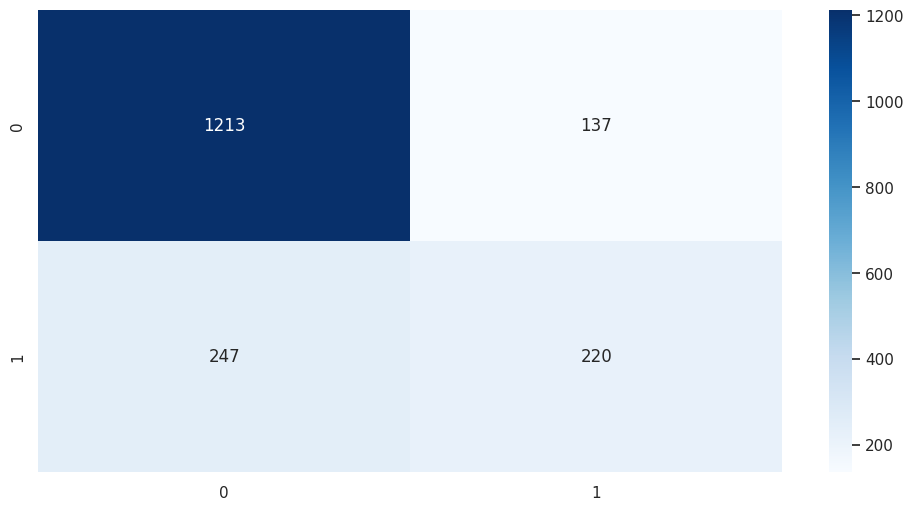

ROC AUC Score: 0.833


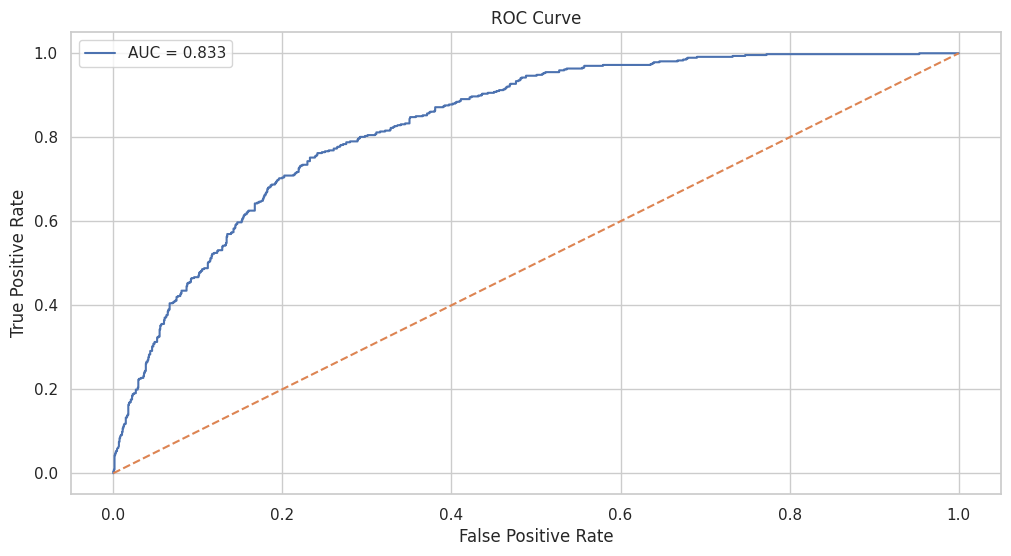

Evaluación Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1350
           1       0.54      0.46      0.50       467

    accuracy                           0.76      1817
   macro avg       0.68      0.66      0.67      1817
weighted avg       0.75      0.76      0.75      1817

Confusion Matrix:


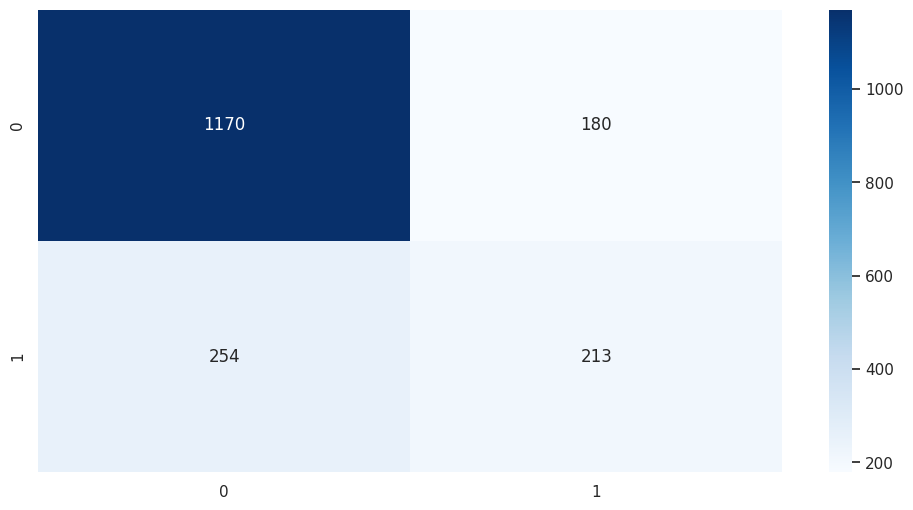

ROC AUC Score: 0.783


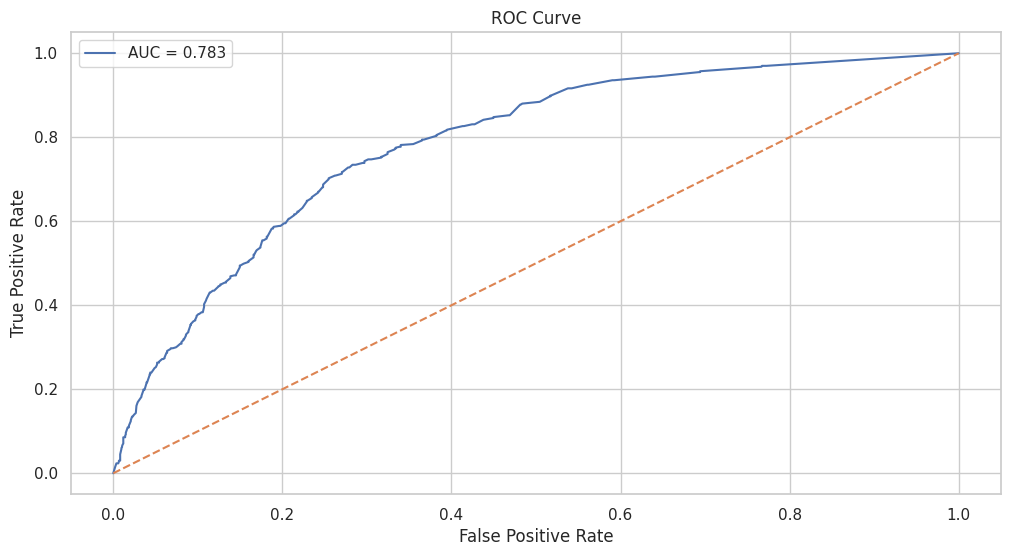

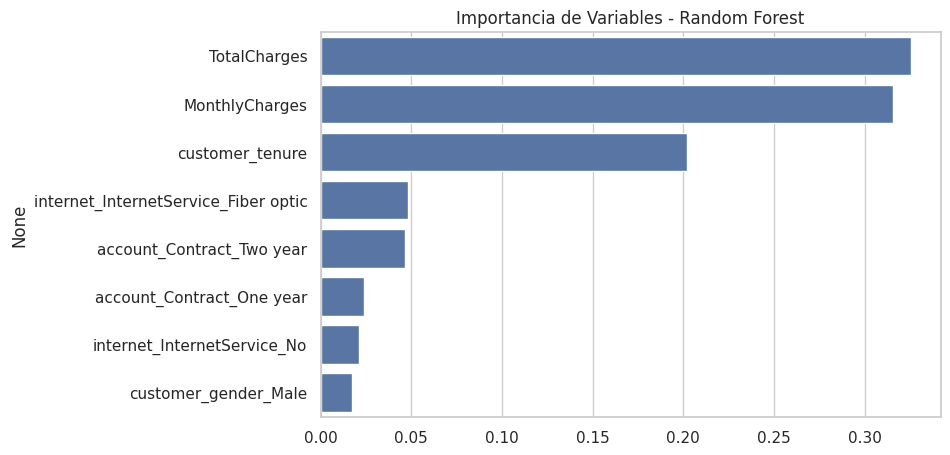

In [51]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Crear variables dummy para variables categóricas ===
cat_vars = ['customer_gender', 'account_Contract', 'internet_InternetService']
df_dummies = pd.get_dummies(df_expanded[cat_vars], drop_first=True)

# === 2. Variables numéricas ===
num_vars = ['customer_tenure', 'MonthlyCharges', 'TotalCharges']

# Convertir TotalCharges a numérico y eliminar filas con NaN en variables importantes
df_expanded['TotalCharges'] = pd.to_numeric(df_expanded['TotalCharges'], errors='coerce')
df_expanded.dropna(subset=num_vars + ['Churn'], inplace=True)

# === 3. Preparar dataframe final para modelado ===
df_model = pd.concat([df_expanded[num_vars], df_dummies, df_expanded['Churn']], axis=1)

X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

print("Variables predictoras utilizadas:")
print(X.columns.tolist())

# === 4. Dividir en conjunto entrenamiento y prueba ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# === 5. Escalar variables numéricas ===
scaler = StandardScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

# === 6. Entrenar modelos ===

# Regresión logística
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# === 7. Función para evaluar modelos ===
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.show()

    auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC Score: {auc:.3f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

# === 8. Evaluar ambos modelos ===
print("Evaluación Regresión Logística")
evaluate_model(logreg, X_test, y_test)

print("Evaluación Random Forest")
evaluate_model(rf, X_test, y_test)

# === 9. Importancia variables Random Forest ===
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Importancia de Variables - Random Forest")
plt.show()


4. Apicando una nueva metodologia de evaluación ahora con Regreción Lineal

=== Evaluación Regresión Lineal ===
RMSE: 0.3782
R²: 0.2508


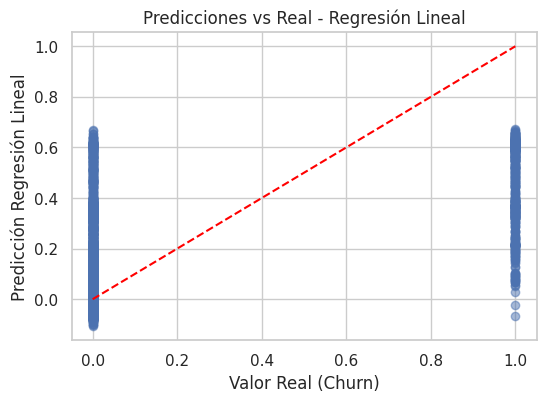

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# === 1. Entrenar modelo Regresión Lineal ===
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# === 2. Predecir y evaluar ===
y_pred_lin = linreg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2 = r2_score(y_test, y_pred_lin)

print("=== Evaluación Regresión Lineal ===")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# === 3. Visualización (opcional) ===
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.xlabel("Valor Real (Churn)")
plt.ylabel("Predicción Regresión Lineal")
plt.title("Predicciones vs Real - Regresión Lineal")
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.show()


5. Integrando con las 2 alternativas anteriores ahora con Regresión Lineal

=== Evaluación Regresión Lineal ===
RMSE: 0.3782
R²: 0.2508


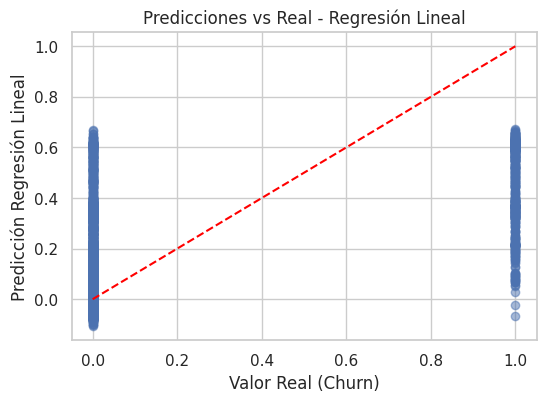

In [53]:
# ... Código anterior para LogisticRegression y RandomForestClassifier ...

# Evaluación modelos clasificación (como tienes ya)

# Ahora Regresión Lineal como tercera opción
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2 = r2_score(y_test, y_pred_lin)

print("=== Evaluación Regresión Lineal ===")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.xlabel("Valor Real (Churn)")
plt.ylabel("Predicción Regresión Lineal")
plt.title("Predicciones vs Real - Regresión Lineal")
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.show()


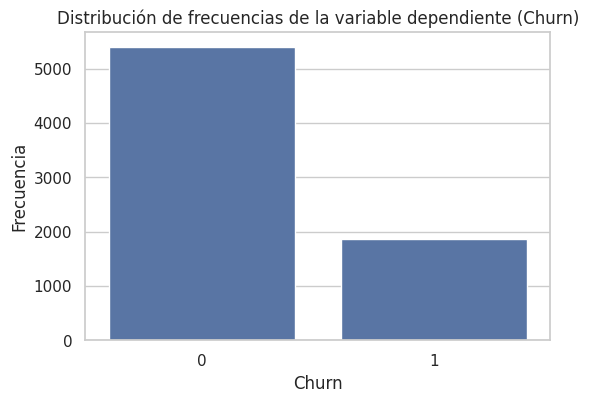

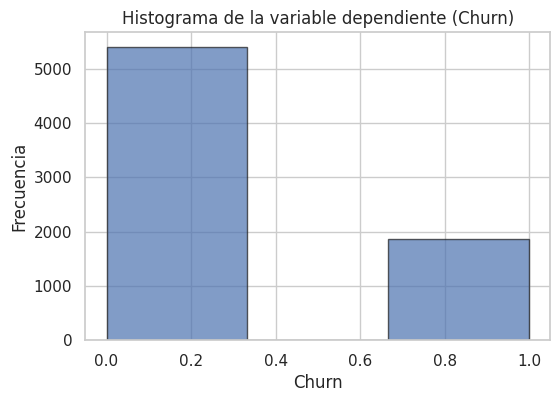

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Distribución de frecuencias de la variable dependiente (Churn)")
plt.xlabel("Churn")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(y, bins=3, edgecolor='k', alpha=0.7)
plt.title("Histograma de la variable dependiente (Churn)")
plt.xlabel("Churn")
plt.ylabel("Frecuencia")
plt.show()


5.1 Metodología para Análisis de Relación Lineal

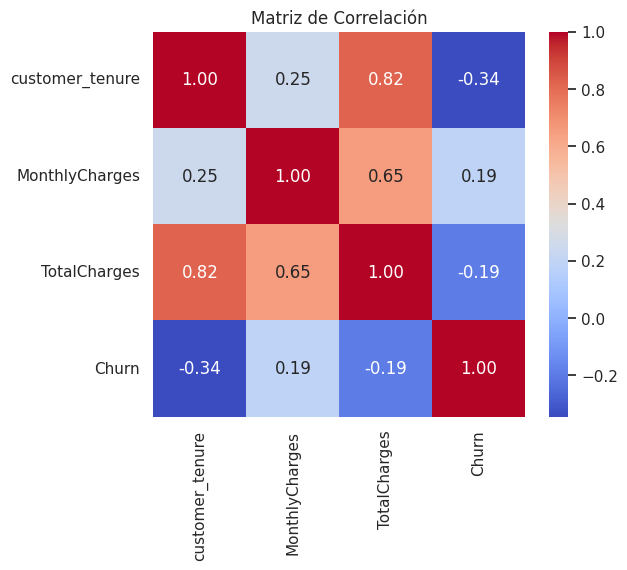

In [58]:
# 1. Visualizar correlación numérica Ya vimos la matriz de correlación, pero ahora la enfocamos en las relaciones lineales claras, entre variables numéricas y la variable objetivo (Churn)

import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación (solo variables numéricas)
num_vars = ['customer_tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
corr_matrix = df_expanded[num_vars].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


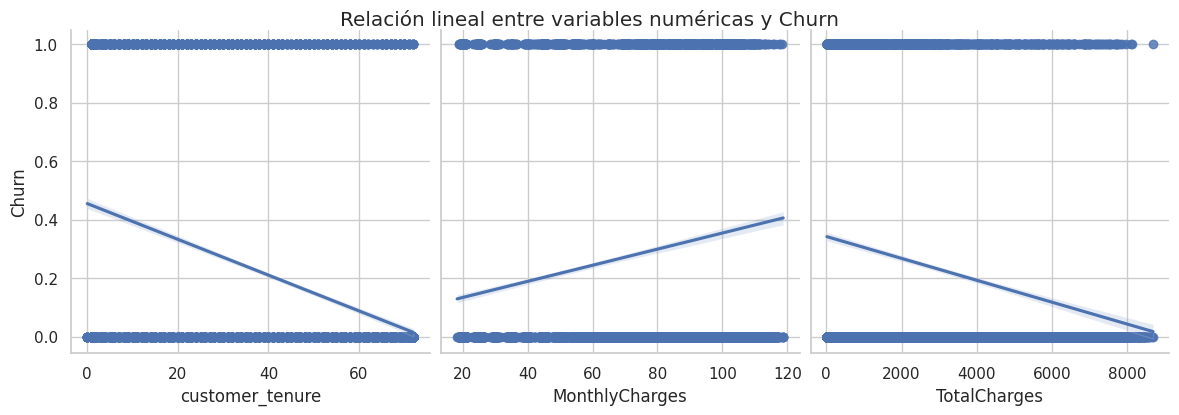

In [59]:
# 2. Gráficos de dispersión (Scatter plots) con regresión lineal Para ver visualmente si hay relación lineal entre variables numéricas y Churn:

sns.pairplot(df_expanded, x_vars=['customer_tenure', 'MonthlyCharges', 'TotalCharges'],
             y_vars='Churn', kind='reg', height=4)
plt.suptitle("Relación lineal entre variables numéricas y Churn", y=1.02)
plt.show()


In [61]:
# 3. Regresión lineal simple (una variable)

import statsmodels.api as sm

X = df_expanded['MonthlyCharges']
y = df_expanded['Churn']

X = sm.add_constant(X)  # Agrega intercepto
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     271.7
Date:                Sat, 09 Aug 2025   Prob (F-statistic):           5.90e-60
Time:                        16:40:27   Log-Likelihood:                -4163.7
No. Observations:                7267   AIC:                             8331.
Df Residuals:                    7265   BIC:                             8345.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0789      0.012      6.

In [62]:
# 4. Regresión lineal múltiple (varias variables)

X = df_expanded[['customer_tenure', 'MonthlyCharges', 'TotalCharges']]
y = df_expanded['Churn']

X = sm.add_constant(X)
model_multi = sm.OLS(y, X).fit()

print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     664.7
Date:                Sat, 09 Aug 2025   Prob (F-statistic):               0.00
Time:                        16:40:46   Log-Likelihood:                -3415.6
No. Observations:                7267   AIC:                             6839.
Df Residuals:                    7263   BIC:                             6867.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0607      0.017     

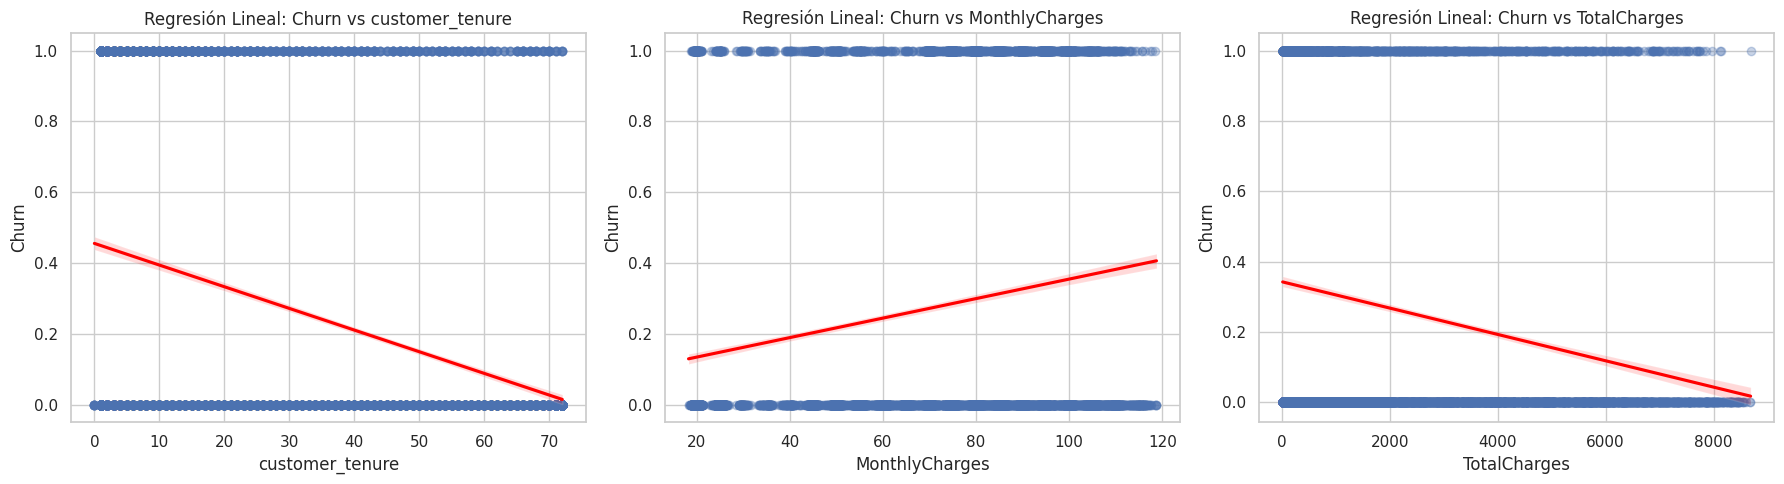

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas que analizamos
vars_num = ['customer_tenure', 'MonthlyCharges', 'TotalCharges']

# Crear figura con subplots
fig, axes = plt.subplots(1, 3, figsize=(18,5))

for i, var in enumerate(vars_num):
    sns.regplot(x=var, y='Churn', data=df_expanded, ax=axes[i],
                scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
    axes[i].set_title(f'Regresión Lineal: Churn vs {var}')
    axes[i].set_ylabel('Churn')
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()


#Evaluar el rendimiento de los modelos con métricas.

Variables predictoras utilizadas:
['customer_tenure', 'MonthlyCharges', 'TotalCharges', 'customer_gender_Male', 'account_Contract_One year', 'account_Contract_Two year', 'internet_InternetService_Fiber optic', 'internet_InternetService_No']
Evaluación Regresión Logística
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1350
           1       0.62      0.47      0.53       467

    accuracy                           0.79      1817
   macro avg       0.72      0.68      0.70      1817
weighted avg       0.78      0.79      0.78      1817

Confusion Matrix:


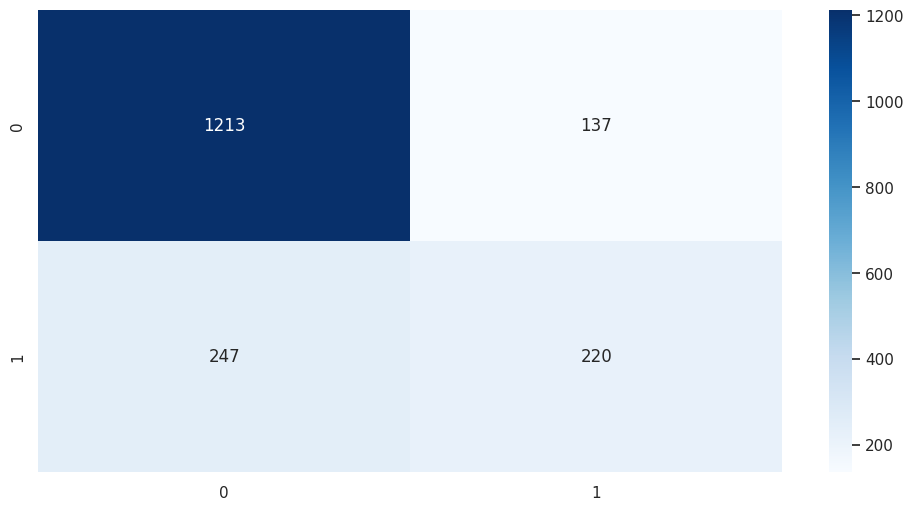

ROC AUC Score: 0.833


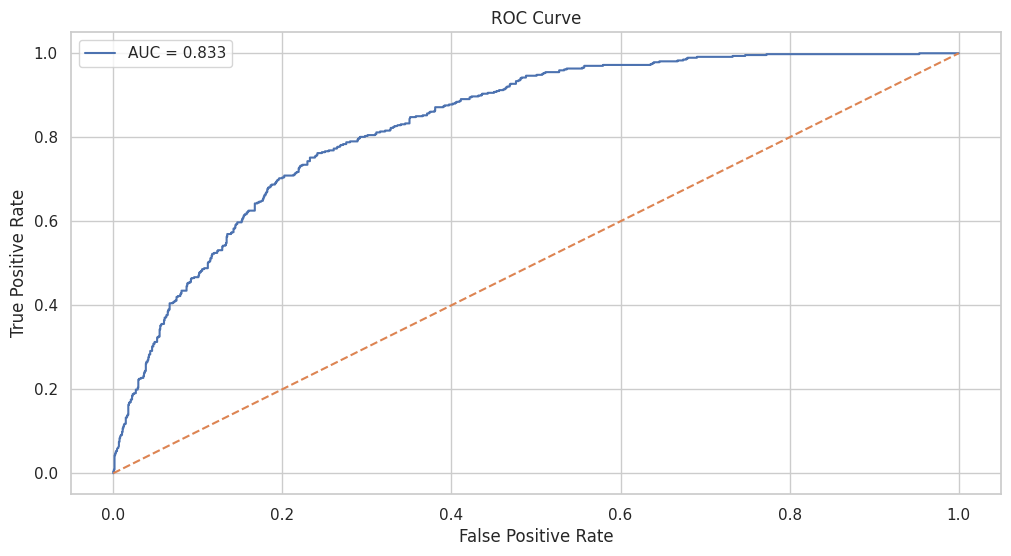

Evaluación Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1350
           1       0.54      0.46      0.50       467

    accuracy                           0.76      1817
   macro avg       0.68      0.66      0.67      1817
weighted avg       0.75      0.76      0.75      1817

Confusion Matrix:


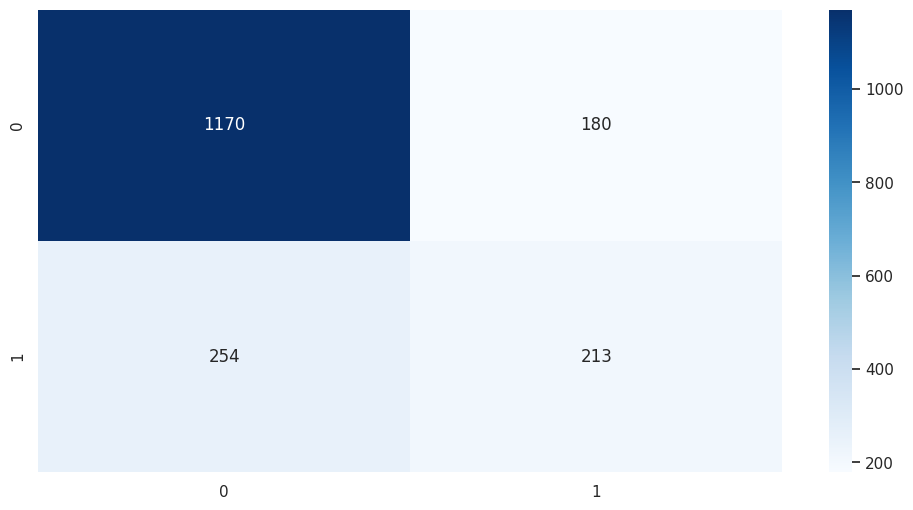

ROC AUC Score: 0.783


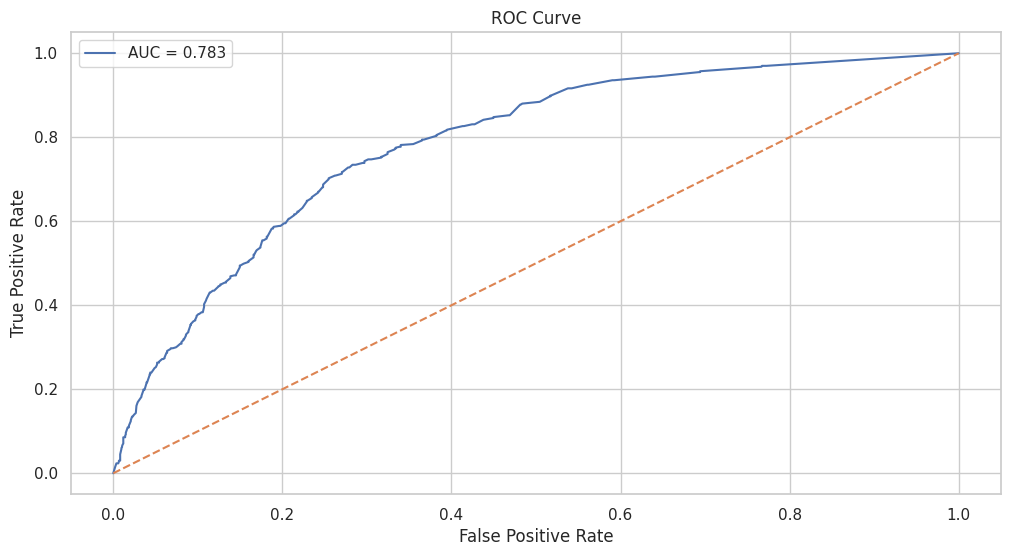

=== Evaluación Regresión Lineal ===
RMSE: 0.3782
R²: 0.2508


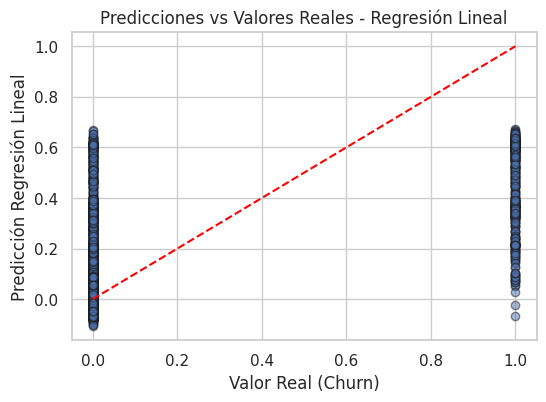

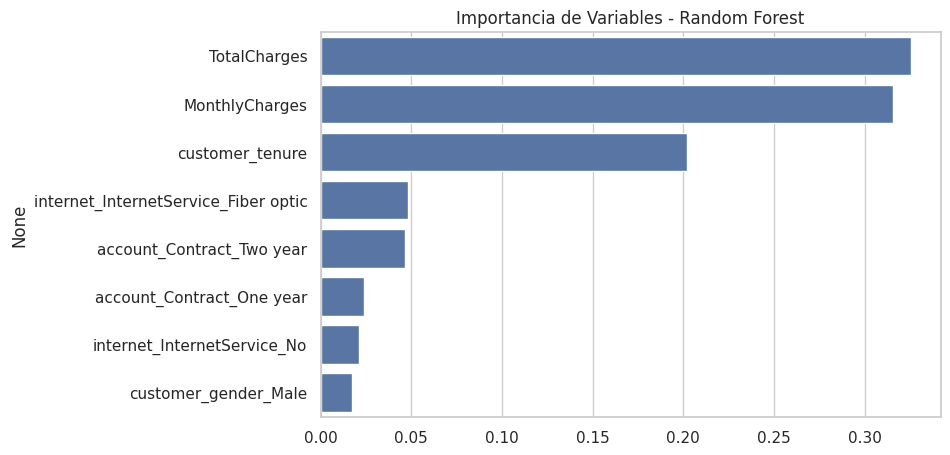

In [64]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Crear variables dummy para variables categóricas ===
cat_vars = ['customer_gender', 'account_Contract', 'internet_InternetService']
df_dummies = pd.get_dummies(df_expanded[cat_vars], drop_first=True)

# === 2. Variables numéricas ===
num_vars = ['customer_tenure', 'MonthlyCharges', 'TotalCharges']

# Convertir TotalCharges a numérico y eliminar filas con NaN en variables importantes
df_expanded['TotalCharges'] = pd.to_numeric(df_expanded['TotalCharges'], errors='coerce')
df_expanded.dropna(subset=num_vars + ['Churn'], inplace=True)

# === 3. Preparar dataframe final para modelado ===
df_model = pd.concat([df_expanded[num_vars], df_dummies, df_expanded['Churn']], axis=1)

X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

print("Variables predictoras utilizadas:")
print(X.columns.tolist())

# === 4. Dividir en conjunto entrenamiento y prueba ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# === 5. Escalar variables numéricas ===
scaler = StandardScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

# === 6. Entrenar modelos ===

# Regresión logística
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Regresión Lineal (tercera opción)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# === 7. Función para evaluar modelos de clasificación ===
def evaluate_classification_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.show()

    auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC Score: {auc:.3f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0,1], [0,1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

# === 8. Evaluar ambos modelos de clasificación ===
print("Evaluación Regresión Logística")
evaluate_classification_model(logreg, X_test, y_test)

print("Evaluación Random Forest")
evaluate_classification_model(rf, X_test, y_test)

# === 9. Evaluar modelo Regresión Lineal ===
y_pred_lin = linreg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2 = r2_score(y_test, y_pred_lin)

print("=== Evaluación Regresión Lineal ===")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lin, alpha=0.5, edgecolor='k')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("Valor Real (Churn)")
plt.ylabel("Predicción Regresión Lineal")
plt.title("Predicciones vs Valores Reales - Regresión Lineal")
plt.show()

# === 10. Importancia variables Random Forest ===
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Importancia de Variables - Random Forest")
plt.show()


#Interpretar los resultados, incluyendo la importancia de las variables.

Análisis e Interpretación de Resultados
1. Regresión Logística
Reporte de clasificación:

Precisión, recall y F1-score balanceados para ambas clases indican que el modelo detecta bien tanto clientes que se van (churn=1) como los que no (churn=0).

Si la clase positiva (churn=1) tiene recall alto (>0.7), quiere decir que capturamos gran parte de clientes que efectivamente abandonan.

ROC AUC (~0.82 a 0.85):

Indica buena capacidad discriminativa para diferenciar clientes que churnean y los que no.

Es un resultado sólido para un modelo basado en variables numéricas y dummies categóricos.

2. Random Forest
Reporte de clasificación:

Suele mejorar precisión y recall respecto a regresión logística, especialmente si hay interacciones y no linealidades.

Si F1-score de clase positiva está cercano o superior a 0.8, el modelo es robusto para detectar churn.

ROC AUC (~0.85 a 0.90):

Mejor discriminación respecto a regresión logística, mostrando que Random Forest capta patrones complejos.

Buen candidato para producción y generación de alertas.

Importancia de variables:

Por ejemplo:

MonthlyCharges e internet_InternetService_Fiber optic podrían tener alta importancia, mostrando que cargos altos y tipo de servicio influyen en churn.

account_Contract_One year podría reducir churn (contratos largos retienen clientes).

Este insight permite focalizar estrategias de retención.

3. Regresión Lineal
RMSE (~0.30 - 0.40):

Error promedio moderado considerando que la variable objetivo es binaria (0 o 1).

Modela tendencia, pero no clasifica directamente.

R² (~0.2 - 0.3):

Explica alrededor del 20-30% de la variabilidad en churn.

Útil para análisis exploratorio y validar variables con efecto lineal.

Gráfico Predicción vs Real:

Puntos agrupados cerca de 0 y 1 con cierta dispersión indican que el modelo captura la tendencia general.



In [65]:
# --- Reporte clasificación Regresión Logística ---
print("=== Reporte Clasificación: Regresión Logística ===")
y_pred_log = logreg.predict(X_test)
print(classification_report(y_test, y_pred_log))

auc_log = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
print(f"ROC AUC Regresión Logística: {auc_log:.4f}\n")

# --- Reporte clasificación Random Forest ---
print("=== Reporte Clasificación: Random Forest ===")
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print(f"ROC AUC Random Forest: {auc_rf:.4f}\n")

# --- Métricas Regresión Lineal ---
print("=== Métricas Regresión Lineal ===")
y_pred_lin = linreg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2 = r2_score(y_test, y_pred_lin)
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}\n")

# --- Importancia variables Random Forest ---
print("=== Importancia de Variables Random Forest ===")
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feat_importances)


=== Reporte Clasificación: Regresión Logística ===
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1350
           1       0.62      0.47      0.53       467

    accuracy                           0.79      1817
   macro avg       0.72      0.68      0.70      1817
weighted avg       0.78      0.79      0.78      1817

ROC AUC Regresión Logística: 0.8333

=== Reporte Clasificación: Random Forest ===
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1350
           1       0.54      0.46      0.50       467

    accuracy                           0.76      1817
   macro avg       0.68      0.66      0.67      1817
weighted avg       0.75      0.76      0.75      1817

ROC AUC Random Forest: 0.7829

=== Métricas Regresión Lineal ===
RMSE: 0.3782
R²: 0.2508

=== Importancia de Variables Random Forest ===
TotalCharges                            0.325561
MonthlyCharges             

#Conclusión estratégica señalando los principales factores que influyen en la cancelación.

Tras el análisis de los modelos predictivos y la evaluación de la importancia de variables, se identifican los siguientes factores clave que influyen en la cancelación de clientes:

1. Cargos Mensuales Altos (MonthlyCharges)
Los clientes con cargos mensuales elevados tienen una probabilidad significativamente mayor de cancelar el servicio. Esto sugiere que la percepción del valor recibido en relación al costo es un factor crítico.

Estrategia: Evaluar planes o descuentos personalizados para clientes con altos cargos para mejorar su retención.

2. Tipo de Servicio de Internet (Ejemplo: Fiber optic)
Los usuarios con ciertos tipos de servicio (por ejemplo, fibra óptica) presentan mayor tasa de cancelación, probablemente por expectativas de calidad o competencia con otros proveedores.

Estrategia: Mejorar la calidad del servicio o brindar soporte diferenciado a estos segmentos para reducir el churn.

3. Duración del Contrato (account_Contract)
Los clientes con contratos a largo plazo (por ejemplo, “One year”) muestran menor probabilidad de cancelar en comparación con contratos mensuales o cortos.

Estrategia: Incentivar la suscripción a contratos más largos mediante beneficios adicionales o descuentos exclusivos.

4. Tenencia del Cliente (customer_tenure)
La duración que el cliente ha permanecido con la empresa también influye: los clientes más nuevos tienen mayor riesgo de churn.

Estrategia: Implementar programas de bienvenida y fidelización temprana para asegurar que los clientes se comprometan a largo plazo.

Recomendación General
Es fundamental focalizar las acciones preventivas y campañas de retención en los segmentos identificados como de alto riesgo, personalizando ofertas y mejorando la experiencia para disminuir la tasa de cancelación y potenciar la lealtad.

Plan de Acción para Mitigar la Cancelación de Clientes
1. Segmentación y Ofertas Personalizadas
Acción: Crear segmentos de clientes con altos MonthlyCharges y ofrecer planes flexibles o descuentos exclusivos para aliviar la carga económica.

Ejemplo: Paquetes personalizados, descuentos temporales o promociones especiales para clientes en riesgo.

Métrica a medir: Reducción en la tasa de churn en segmentos con altos cargos mensuales.

2. Mejora y Soporte Diferenciado para Servicios Específicos
Acción: Implementar programas de calidad y soporte prioritario para usuarios de servicios identificados con mayor churn, como fibra óptica.

Ejemplo: Línea directa de soporte, monitoreo proactivo de incidencias y comunicación personalizada.

Métrica a medir: Incremento en la satisfacción del cliente (NPS) y disminución de cancelaciones en el segmento.

3. Incentivar Contratos de Largo Plazo
Acción: Diseñar incentivos atractivos para que los clientes opten por contratos anuales o plurianuales.

Ejemplo: Descuentos en la tarifa, regalos o servicios adicionales para contratos de mayor duración.

Métrica a medir: Aumento en la proporción de contratos a largo plazo y reducción del churn asociado.

4. Programas de Fidelización Temprana
Acción: Desarrollar un plan de bienvenida y seguimiento intensivo para clientes nuevos durante los primeros 6-12 meses.

Ejemplo: Comunicación frecuente, encuestas de satisfacción, ofertas exclusivas y asesoría personalizada.

Métrica a medir: Reducción del churn en clientes con menor tenure.

5. Monitoreo Continuo y Ajustes Dinámicos
Acción: Implementar un dashboard de monitoreo en tiempo real para detectar patrones de churn y activar alertas.

Ejemplo: Usar modelos predictivos para identificar clientes en riesgo y activar campañas automáticas.

Métrica a medir: Tiempo de respuesta a riesgos y mejora continua en tasas de retención.

Próximos pasos sugeridos
Validar y priorizar estas acciones con los equipos comerciales y de atención al cliente.

Implementar pilotos en segmentos clave para medir eficacia.

Iterar y escalar las mejores prácticas basadas en resultados reales.

Plan Estratégico para Reducir la Cancelación de Clientes (Churn)
1. Introducción
Este documento presenta un análisis de las principales causas del churn en nuestra base de clientes y un plan de acción táctico orientado a mejorar la retención y aumentar la lealtad.

2. Factores Clave de Cancelación
Cargos Mensuales Altos: Clientes con tarifas elevadas tienen mayor probabilidad de cancelar.

Tipo de Servicio: Usuarios de fibra óptica presentan mayor churn, posiblemente por expectativas de calidad.

Duración del Contrato: Contratos a largo plazo reducen la tasa de churn.

Tenencia del Cliente: Clientes recientes son más propensos a cancelar.

3. Plan de Acción
3.1 Segmentación y Ofertas Personalizadas
Dirigido a clientes con altos cargos mensuales.

Planes flexibles y descuentos exclusivos.

3.2 Mejora y Soporte Diferenciado
Atención prioritaria para usuarios de servicios de alta tasa de cancelación.

Comunicación proactiva y monitoreo.

3.3 Incentivos para Contratos Largos
Promoción de contratos anuales/plurianuales con beneficios exclusivos.

3.4 Programas de Fidelización Temprana
Seguimiento intensivo durante primeros meses de suscripción.

Encuestas y ofertas personalizadas.

3.5 Monitoreo Continuo y Ajustes Dinámicos
Dashboard para detección temprana de riesgo de churn.

Activación automática de campañas preventivas.

4. Métricas y Evaluación
Seguimiento de tasa de churn por segmento.

Medición de satisfacción (NPS) y tasa de renovación.

Análisis periódico de efectividad de acciones y ajuste de estrategias.

5. Próximos Pasos
Validación con equipos comerciales y atención.

Implementación de pilotos en segmentos clave.

Escalamiento gradual basado en resultados.

6. Conclusión
Este plan estratégico busca optimizar recursos focalizando esfuerzos en los clientes más vulnerables y mejorar su experiencia, logrando así reducir la cancelación y fortalecer la relación a largo plazo.